This notebook will be used for data science capstone course

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

! pip install seaborn
%matplotlib inline 


In [3]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_8cfcaf10a76849199623bc7c6b315397 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1OBcv5aGMDrc15xSjE1oOoLr296muBWtvEKJ_wPdMWmn',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_8cfcaf10a76849199623bc7c6b315397.get_object(Bucket='capstoneproject-donotdelete-pr-b2nedsixzoecyc',Key='CapstoneData4.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,Year,Month,Landfall,X,Y,Winds,Category,Casualties
0,1940,August,Sabine Pass,-93.8948,29.7333,100,2,0
1,1941,September,Sabine Pass,-93.8948,29.7333,120,3,4
2,1942,September,Texas City,-94.9027,29.3838,80,1,0
3,1942,August,Galveston,-94.7977,29.3013,115,3,8
4,1943,July,Matagorda,-95.9683,28.6911,100,2,19


In [4]:
print(df_data_0.dtypes)

Year            int64
Month          object
Landfall       object
X             float64
Y             float64
Winds           int64
Category        int64
Casualties      int64
dtype: object


In [5]:
df_data_0.size

248

In [6]:
df_data_0.corr()

,Year,X,Y,Winds,Category,Casualties
Year,1.000000,-0.193295,-0.170823,-0.001973,-0.002726,0.386828
X,-0.193295,1.000000,0.920600,-0.454584,-0.421870,-0.019999
Y,-0.170823,0.920600,1.000000,-0.433779,-0.385479,0.082562
Winds,-0.001973,-0.454584,-0.433779,1.000000,0.961254,0.351326
Category,-0.002726,-0.421870,-0.385479,0.961254,1.000000,0.351314
Casualties,0.386828,-0.019999,0.082562,0.351326,0.351314,1.000000


(0, 88.33716612605808)

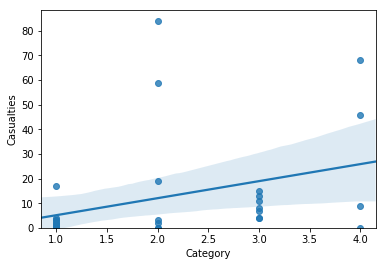

In [7]:
sns.regplot(x="Category", y="Casualties", data=df_data_0)
plt.ylim(0,)

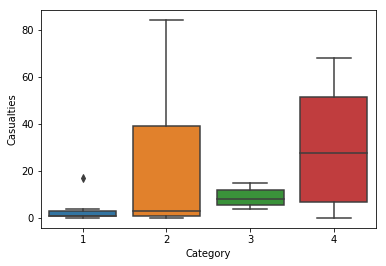

In [8]:
sns.boxplot(x="Category", y="Casualties", data=df_data_0)

In [9]:
df_data_0.describe()

,Year,X,Y,Winds,Category,Casualties
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1972.612903,-95.623200,28.504329,103.709677,2.064516,12.483871
std,24.887316,1.352701,1.377319,20.694917,1.093480,21.521882
min,1940.000000,-97.497500,25.901700,75.000000,1.000000,0.000000
25%,1951.500000,-97.176050,27.910600,85.000000,1.000000,1.000000
50%,1970.000000,-94.902700,29.301300,100.000000,2.000000,3.000000
75%,1989.000000,-94.593800,29.473450,115.000000,3.000000,12.000000
max,2020.000000,-93.894800,30.080200,145.000000,4.000000,84.000000


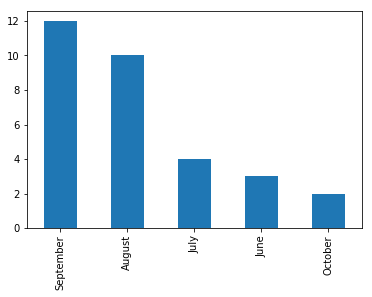

In [7]:
df_data_0["Month"].value_counts().plot(kind = "bar")

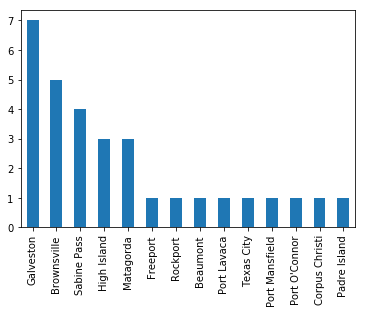

In [10]:
df_data_0["Landfall"].value_counts().plot(kind = "bar")



In [13]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

# All requested packages already installed.

Folium installed and imported!


In [5]:
map = folium.Map(location = [29.7604,-95.3698], zoom_start = 7)
map

In [20]:
map = folium.Map(location = [29.7604,-95.3698], tiles = "Stamen Terrain", zoom_start = 7)

#'Landfall': ['Galveston', 'Brownsville', 'Sabine Pass', 'High Island', 'Matagorda', 'Freeport', 'Rockport', 'Beaumont', 'Port Lavaca', 'Texas City', 'Port Mansfield', "Port O'Connor", 'Corpus Christi', 'Padre Island' ]
#'Count': [7, 5, 4, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1]

incidents = folium.map.FeatureGroup()

for lat, lng, in zip(df_data_0.Y, df_data_0.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius= 5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

map.add_child(incidents)

map